# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 6: Multi-Layer Perceptron (MLP) ##

![mlp.jpg](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjH2GbE1DXODQ8tnCVkn8S7F4KiCfaC0RvFt3I2L8d6YQplfHbKWGkaU20EwY7zWj9TjLxn1WdKey8kpqnox_KAKmS3qn0fN2kRLht9tr1bGNkcLgNiK3IUKJiAYd1bP5IXsaKc5s__4H0nLkLw2m2kNLoOU7R_hMpBXfDES-NxIFPPY_RBOpUkoUt-aQ/w613-h345/Multi-layer%20perceptron%20intro%20image.png "Image Source: https://www.pycodemates.com/2023/01/multi-layer-perceptron-a-complete-overview.html")

<font size="1">Image Source: https://www.pycodemates.com/2023/01/multi-layer-perceptron-a-complete-overview.html</font>

## Task 0: Mount Google Drive and Import Libraries
Download and save a copy of the Lab6 Notebook and Datasets (*test_labels.csv*) to your Google Drive, ensuring that all these files are in the same location.

In [1]:
# if __name__ == '__main__':
#   from google.colab import drive
#   drive.mount("/content/drive")

Modify the pathway of the *%cd* shell command according to the location in your Google Drive where you have saved the Notebook and datasets. For example, if you saved the files the files in the location `MyDrive/lab6`: 


then you can run the following `%cd` code to access that directory:

```
%cd "/content/drive/MyDrive/lab6"
```

You can also run the following code to ensure you are in the correct working directory.

```
%ls
```

It should display the filenames of *HKProp_Dataset.csv*.

In [1]:
# # Please delete the "# ADD YOUR PATH HERE" after you update the path
# %cd "/content/drive/MyDrive/"+"lab6" # ADD YOUR PATH HERE
%ls

 ������ C �еľ�û�б�ǩ��
 �������к��� 8C49-9D6C

 c:\Users\Administrator\Documents\Courses\COMP2211\lab6 ��Ŀ¼

2024/04/24  02:17    <DIR>          .
2024/04/23  14:41    <DIR>          ..
2024/04/24  00:02    <DIR>          .ipynb_checkpoints
2024/04/23  14:39           159,254 HKProp_Dataset.csv
2024/04/23  14:39           604,374 lab6_review.ipynb
2024/04/24  02:21         2,099,104 lab6_tasks.ipynb
2024/04/24  02:17           124,712 mlp_model.keras
               4 ���ļ�      2,987,444 �ֽ�
               3 ��Ŀ¼ 293,740,703,744 �����ֽ�


For this lab activity, we will use the **Numpy** and **Pandas** library to load and process data, and use **folium** and **plotly** for visualization. Please import these by running the code below.

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. If you want to know more about **Pandas**, you can check the documentation in https://pandas.pydata.org/docs/

In [2]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import datetime

## Dataset Description

As a partner of a property investment company, your objective is to make a profit from investing in and the eventual sale of invested properties. To do this, you need a solid property prediction model based on historical property transactions. To enable the prediction of future property prices from your prediction model compared against prevailing asking prices. So that the future sale of a property will bring in a nice profit.

The Hong Kong Island areas of Central, Sheung Wan and Sai Wan private housing dataset is a Excel Comma Separated Value (CSV) text file, which include 29 features and 1139 observations. Each observation represents the sale of a home and each feature is an attribute describing the house or the circumstance of the sale. 

The features include string, boolean, categorical and numerical variables. These features are as follows:

| Field Label | Field description | Data format | Remark |
| --- | --- | --- | --- |
| Reg_Date | Register date in Land Registry | DD/MM/YYYY |  |
| Reg_Year | Register year | YYYY | Extract from Reg_Date field |
| Prop_Name_ENG | Name of the property | String |  |
| Address_ENG | Address of the property | String |  |
| Prop_Type | Type of the property | Boolean (Single/ Estate) |  |
| Tower | Tower number | String |  |
| Floor | Floor of the property | Numeric |  |
| Floor_(H/M/L) | Floor category (H/M/L) | Category (H/M/L) | Floor 0 to 15 => L, Floor 16 to 34 => M, Floor upper than 35 => H |
| Flat | Flat of the property | String |  |
| Bed_Room | No. of bed room of the property | Numeric |  |
| Roof | Roof included? | Boolean (Y/N) |  |
| Build_Ages | Building age at registration | String |  |
| Rehab_Year | Year of building rehabilitation schemes | Numeric | [Website](https://www.ura.org.hk/en/project/rehabilitation/building-rehabilitation-schemes) |
| Eff_Build_Age | Effective building age that consider the building rehabilitation schemes | String | If URA is 0, Eff_Age = Build_Ages. If URA is not 0, (Reg_Year)+{[Build_Age-(Reg_Year-URA)]*2/3} |
| SalePrice_10k | Sale Price | Numeric |  |
| SaleableArea | Saleable area of the property | Numeric |  |
| Gross Area | Gross area of the property | Numeric |  |
| SaleableAreaPrice | Price per saleable area | Numeric |  |
| Gross Area_Price | Price per gross area | Numeric |  |
| Kindergarten | No. of kindergarten near the property | Numeric |  |
| Primary_Schools | No. of primary schools near the property | Numeric |  |
| Secondary_Schools | No. of secondary schools near the property | Numeric |  |
| Parks | No. of public parks near the property | Numeric |  |
| Library | No. of library near the property | Numeric |  |
| Bus_Route | No. of bus stations near the property | Numeric |  |
| Mall | No. of shopping mall near the property | Numeric | Shun Tak Centre, Western Market, Infinitus Plaza |
| Wet Market | No. of wet market near the property | Numeric |  |
| Latitude | The latitude of the property | Numeric | [Website](http://www.mapdevelopers.com/batch_geocode_tool.php) |
| Longitude | The longitude of the property | Numeric | [Website](http://www.mapdevelopers.com/batch_geocode_tool.php) |
| Edu_Inst | The education institution near the property | Numeric | Sum of Kindergarten, Primary_Schools and Secondary_Schools |



Relevant information on the datasets can be retrieved by running the code below:

In [3]:
# load the Hong Kong Properties dataset 
pd.set_option('display.max_columns', None)
dataframe = pd.read_csv('HKProp_Dataset.csv')
dataframe.head()

,Reg_Date,Reg_Year,Prop_Name_ENG,ADDRESS_ENG,Prop_Type,Estate_Size,Tower,Floor,Flat,Bed_Room,Roof,Build_Ages,Rehab_Year,SalePrice_10k,SaleableArea,Gross Area,SaleableAreaPrice,Gross Area_Price,Kindergarten,Primary_Schools,Secondary_Schools,Parks,Library,Bus_Route,Mall,Wet Market,Latitude,Longitude
0,26/10/2016,2016,18 SHELLEY STREET,18 SHELLEY STREET,Single,1,NaN,3,18,NaN,N,40,NaN,685,464,--,"$14,763",--,1,2,1,6,0,52,0,0,22.281442,114.152991
1,16/11/2017,2017,Lilian Court,6-8 SHELLEY STREET,Single,1,NaN,19,A,2.0,N,24,NaN,538,333,522,"$16,156","$10,307",1,2,0,4,0,29,0,0,22.281865,114.153329
2,11/10/2016,2016,Lilian Court,6-8 SHELLEY STREET,Single,1,NaN,6,B,2.0,N,23,NaN,595,333,522,"$17,868","$11,398",1,2,0,4,0,29,0,0,22.281865,114.153329
3,18/10/2017,2017,Felicity Building,9-13 SHELLEY STREET,Single,1,NaN,20,E,NaN,N,39,NaN,490,NaN,--,--,--,1,1,1,9,0,31,0,0,22.281688,114.152795
4,18/10/2017,2017,9-13 SHELLEY STREET,9-13 SHELLEY STREET,Single,1,NaN,2,A,NaN,N,51,NaN,720,370,--,"$19,459",--,1,0,1,7,0,45,0,0,22.281688,114.152795


You can check the shape of the dataframe we used in this lab. The correct shape should be `(1100, 28)`.

In [5]:
# print the shape for the dataframe
print(dataframe.shape)

(1100, 28)


## Visualization of the Sale Price distribution

Before we start our research, we first have a visualization to better understand the distribution of our data. The target value for this analysis is the sale price, which is `'SalePrice_10k'` in the dataframe. We will use the sale price of different properties as the radius for the circle marker and visualize them in the map. We use different color to plot the sale price for `(0,600)`, `(600,1000]`, and `(1000,+∞)`

You can explore the sale price directly on the map. By clicking the circle on the map, you can see the name, type, and floor of different properties. 

In [6]:
# Visualize the sale price
hongkong_map = folium.Map(location=[22.281442,114.152991],
                        zoom_start=15,
                   tiles="cartodbpositron")

for i in range(len(dataframe)):
    lat = dataframe['Latitude'].iloc[i] 
    long = dataframe['Longitude'].iloc[i] 
    SalePrice_10k = dataframe['SalePrice_10k'].iloc[i]
    radius = min(SalePrice_10k/100, 20)

    if SalePrice_10k > 1000:
        color = "#008080"  # blue high price
    elif SalePrice_10k < 600:
        color = "#9BCD9B"  # grey cheap price
    else:
        color = "#9C9C9C"  # green normal price
    
    popup_text = """Name : {}<br>
                Type : {}<br>
                Floor : {}<br>"""
    
    popup_text = popup_text.format(
        dataframe['Prop_Name_ENG'].iloc[i], 
        dataframe['Prop_Type'].iloc[i], 
        dataframe['Floor'].iloc[i]
        )

    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(hongkong_map)

hongkong_map

Another direct visualization tool to check the locations for the most sold properties is to use a heatmap. You can zoom in or zoom out to find the location distribution of these sales.

In [7]:
num = len(dataframe)
lat = np.array(dataframe["Latitude"][0:num])                       
lon = np.array(dataframe["Longitude"][0:num])                        
rent_room = np.array(dataframe["SalePrice_10k"][0:num],dtype=float)    

data1 = [[lat[i],lon[i],rent_room[i]] for i in range(num)]    

hongkong_map = folium.Map(location=[22.285442,114.152991],
                        zoom_start=16) 
HeatMap(data1).add_to(hongkong_map) 
folium.TileLayer('cartodbpositron').add_to(hongkong_map)

hongkong_map

After having a glance at the dataset distribution, you may now have a brief understanding of how the sale prices are connected to the locations. Here we preprocess and combine the features in the datasheet to construct training and validation data `X_trainval, y_trainval`, and testing data `X_test, y_test` for training and evaluating our MLP model. **Please DO NOT modify the code**. The correct shape should be `(1000, 166) (100, 166) (1000,) (100,)` for `X_trainval, X_test, y_trainval, y_test`, respectively.

In [4]:
# Codes for generating input data and ground truth labels
# Please DO NOT modify the code

y = np.array(dataframe['SalePrice_10k'])

# replace '--' with 0, replace $ with space.
dataframe = dataframe.replace('--', '0').replace('$', '')  
Reg_Date = pd.to_datetime(np.array(dataframe['Reg_Date']),infer_datetime_format=True)
Days_to_reg_date = [int(t.days) for t in (Reg_Date - datetime.datetime.today())]
Bedroom = dataframe['Bed_Room'].replace('Studio', '0').fillna(0)
Is_studio = [1 if e == 0 else 0 for e in np.array(dataframe['Bed_Room'])] 

SaleableArea = [int(str(t).replace(',', '').replace('nan', '0')) for t in dataframe['SaleableArea']]
SaleableAreaPrice = [int(str(t).replace(',', '').replace('$', '0').replace('nan', '0')) for t in dataframe['SaleableAreaPrice']]
GrossArea = [int(str(t).replace(',', '').replace('nan', '0')) for t in dataframe['Gross Area']]
GrossAreaPrice = [int(str(t).replace(',', '').replace('$', '0').replace('nan', '0')) for t in dataframe['Gross Area_Price']]

X = np.concatenate([np.array(Days_to_reg_date).reshape(-1, 1), np.array(Bedroom).reshape(-1, 1),
                        np.array(Is_studio).reshape(-1, 1), np.array(SaleableArea).reshape(-1, 1),
                        np.array(GrossAreaPrice).reshape(-1, 1),
                        np.array(GrossArea).reshape(-1, 1),
                        np.array(SaleableAreaPrice).reshape(-1, 1),
                        np.array(pd.get_dummies(dataframe[['Flat', 'Prop_Type', 'Tower', 'Roof']])),
                       np.array(dataframe[['Floor', 'Build_Ages', 'Rehab_Year', 'Kindergarten', 'Primary_Schools', 'Secondary_Schools',
 'Parks', 'Library', 'Bus_Route', 'Mall', 'Wet Market', 'Latitude', 'Longitude']].fillna(0))], axis=1)

X_trainval, X_test, y_trainval, y_test = X[:1000], X[1000:], y[:1000], y[1000:]
print(X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape)


(1000, 166) (100, 166) (1000,) (100,)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29184\53659996.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29184\53659996.py:8: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



## Task 1: Dataset Splitting and Preprocessing

We will randomly shuffle and then split the training-validation dataset `(X_trainval, y_val)` into training set `(X_train, y_train)` and validation set `(X_val, y_val)` using the following two functions.

**Task 1.1**: Implement a function `shuffle_data_numpy()`: The function takes the data `(X, y)` and `numpy_seed` as the input, and output the shuffled `(X_shuffle, y_shuffle)`. If the seed are fixed, the shuffled results are consistent across multiple runs. Note that you **CANNOT** use `sklearn.utils.shuffle`

**Task 1.2**: Implement a function `train_val_split()`: The function should randomly shuffle the data with `shuffle_data_numpy` and then return split the data into training set `(X_train, y_train)` and validation set `(X_val, y_val)`. The length for `(X_train, y_train)` should be the given `train_size`. You will use this function to split the data `(X_trainval, y_trainval)`. Note that you **CANNOT** use `train_test_split` from `sklearn`

In [5]:
# DO NOT IMPORT ANY ADDITIONAL LIBRARY! (e.g. sklearn)
def shuffle_data_numpy(X, y, numpy_seed):
    # fix the random seed
    np.random.seed(numpy_seed)

    # TODO Task 1.1
    # shuffle the given data pair (X, y)
    # please use numpy functions so that the results are controled by np.random.seed(numpy_seed)
    X_y = np.column_stack((X, y))
    np.random.shuffle(X_y)
    X_shuffle = X_y[:, :-1]
    y_shuffle = X_y[:, -1]

    return X_shuffle, y_shuffle

def train_val_split(X_trainval, y_trainval, train_size, numpy_seed):
    # TODO TASK 1.2 
    # apply shuffle on the data with given random seed, then split the data into training and validation sets
    X_trainval_shuffle, y_trainval_shuffle = shuffle_data_numpy(X_trainval, y_trainval, numpy_seed)
    X_train = X_trainval_shuffle[:train_size]
    X_val = X_trainval_shuffle[train_size:]
    y_train = y_trainval_shuffle[:train_size]
    y_val = y_trainval_shuffle[train_size:]

    return X_train, X_val, y_train, y_val

Here we use `numpy_seed=42` and split the data into a training set with 700 samples and remaining as the validation set.

If your function are implemented correctly, the `print()` should return `(700, 166) (300, 166) (700,) (300,)`

In [8]:
X_train, X_val, y_train, y_val = train_val_split(X_trainval, y_trainval, 700, 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(700, 166) (300, 166) (700,) (300,)


## Task 2: MLP Model Building, Compiling, and Training

**Task 2.1**: Implement the function `MyModel(num_dense_layer, dense_layer_unit, input_dim, dropout_ratio)` that builds an MLP model with the following input arguments as the setting:
- `num_dense_layer`: the numbers of Dense layer in the model **excluding** the output layer(node).
- `dense_layer_unit`: the number of units in the dense layer. Are all hidden layers using the same number of neurons.
- `input_dim`: the input feature dimension.
- `dropout_ratio`: the fraction of the input units to drop.

Please also follows the following rules:
- There are one `Dropout()` layer after one hidden `Dense` layer in the model. 
- The activation for hidden `Dense()` layer should be `ReLU`.
- All layers are initialized using `uniform` kernel. (Not the `glorot_uniform`)
- The activation for output layer(node) should be `linear`.
- There should be `2*num_dense_layer+1` layers in total

The function should return the built model. Please note that you do not need to call `model.compile()` or `model.fit()` in this function because they are the follow-up tasks.
No additional import are allowed

In [9]:
# No additional import allowed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def MyModel(num_dense_layer, dense_layer_unit, input_dim, dropout_ratio):
    # Create a sequential model
    model = Sequential()

    # TODO Task 2.1
    # Build your own model with model.add(), Dense layers, and Dropout layers
    # Hint: you may consider using
        # Dense(): https://keras.io/api/layers/core_layers/dense/
        # Dropout(): https://keras.io/api/layers/regularization_layers/dropout/
    model.add(Dense(dense_layer_unit, input_dim=input_dim, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(dropout_ratio))
    for _ in range(num_dense_layer - 1):
        model.add(Dense(dense_layer_unit, activation='relu', kernel_initializer='uniform'))
        model.add(Dropout(dropout_ratio))
    model.add(Dense(1, kernel_initializer='uniform'))

    return model

We build a MLP model with 2 `Dense` hidden layers. Each layer consists 40 units. Dropout are set to be `0` (No dropout)

You can modify these setting to see how the architectures of MLP influence the performance.

But Keep them as the default setting for the model for ZINC Submission!

In [10]:
# Keep them as the default setting for the model you submitted to ZINC!
num_dense_layer = 2
dense_layer_unit = 40
input_dim = len(X_train[0])
dropout_ratio = 0

model = MyModel(num_dense_layer, dense_layer_unit, input_dim, dropout_ratio)
model.summary()

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │         6,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,361 (32.66 KB)

 Trainable params: 8,361 (32.66 KB)

 Non-trainable params: 0 (0.00 B)

**Task 2.2**: Implement the function `MyModel_Training(model, X_train, y_train, X_val, y_val)` that compile and train the defined model
- You should use `Adam` Optimizer with learning rate `1e-3`
- The loss function for training is Mean Squared Error (`mse`), the metrics for evaluation is Mean Absolute Error (`mae`)
- Return the **training history** and trained model. `History.history` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

Then you can start you training with different `batchsize` and `train_epoch` settings! 

The training arguments `batchsize` and `train_epoch` are the only two parameters you can change. 

We suggest not to use `train_epoch > 100` which will spend too much time for training.

In [11]:
from tensorflow.keras.optimizers import Adam

def MyModel_Training(model, X_train, y_train, X_val, y_val, batchsize, train_epoch):

    # TODO Task 2.2
    # Compile and train the given model
    # Hint: history can be returned by model.fit() function, please see https://keras.io/api/models/model_training_apis/
    adam_optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=adam_optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=train_epoch, validation_data=(X_val, y_val), validation_batch_size=batchsize)

    return history, model

model = MyModel(num_dense_layer, dense_layer_unit, input_dim, dropout_ratio)

batchsize = 8
train_epoch = 50

history, model = MyModel_Training(model, X_train, y_train, X_val, y_val, batchsize, train_epoch)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Average Error (MAE): {test_mae}')

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2103186.2500 - mae: 762.8300 - val_loss: 1811877.7500 - val_mae: 462.8858
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1769551.8750 - mae: 418.3957 - val_loss: 1422649.6250 - val_mae: 403.5750
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 736664.6250 - mae: 347.0949 - val_loss: 1312627.0000 - val_mae: 428.7822
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 987164.1250 - mae: 418.3914 - val_loss: 1213236.2500 - val_mae: 454.1514
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1116310.5000 - mae: 414.2058 - val_loss: 1165690.5000 - val_mae: 404.7793
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 719259.8125 - mae: 368.9258 - val_loss: 1119473.8750 - val_mae: 491.8406
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 598183.4375 - mae: 390.7790 - val_loss: 1090060.3750 - val_mae: 427.1638
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 646053.1250 - mae: 407

With proper choice for training epochs and batch size, the expected test Mean Average Error (MAE) should be lower than 80. Ideally, it should be around 70. (We only require MAE < 80 for grading)

If the model you trained achieve the goal, please save the model by running following codes.

In [14]:
model.save('./mlp_model.keras')

You can load the model you just saved and check the mean average error again

In [12]:
from tensorflow.keras.models import load_model
mlp_model = load_model("./mlp_model.keras")
test_loss, test_mae = mlp_model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Average Error (MAE): {test_mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12101.5195 - mae: 64.6126 
Test Mean Average Error (MAE): 68.59362030029297


### Sanity Check of your MLP Training

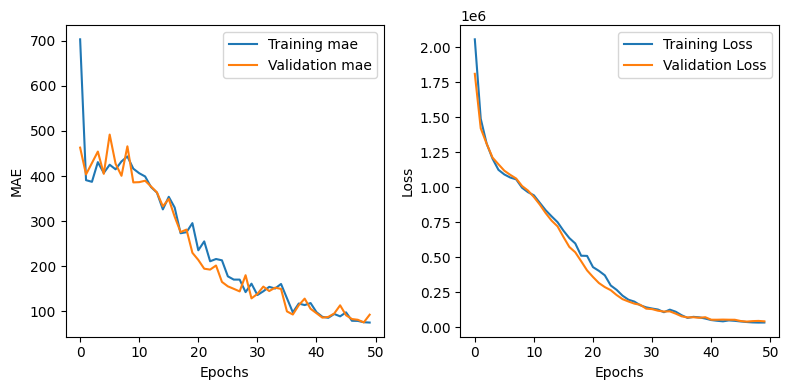

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### How accurate can your model predicted the sales price? Let's check!
Here we plot the predicted sale price (y-axis) vs. ground truth sales price (x-axis). If you find most of the points distributed near the line `y=x`, your MLP model can help make a prediction for the house price!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


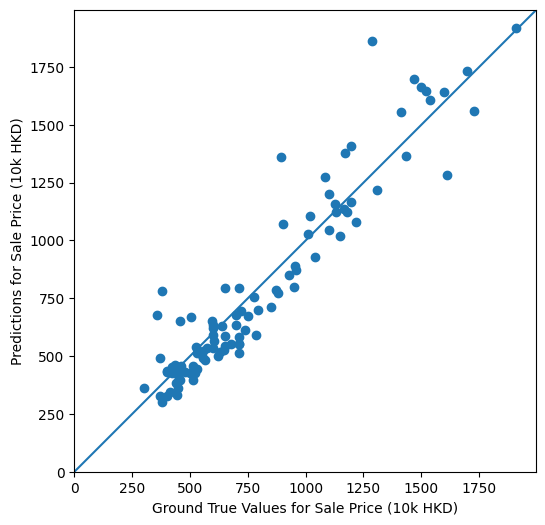

In [14]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, test_predictions)
plt.xlabel('Ground True Values for Sale Price (10k HKD)')
plt.ylabel('Predictions for Sale Price (10k HKD)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 3000], [-100, 3000])

# Submission for Lab 6

Please copy all the function you implemented into the file `lab6_tasks.py`, and submit it together with your `mlp_model.keras` model weight file.